<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/Hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Візьміть датасет movielens і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163348 sha256=0214b3f83e77c037f696b82d18c119e9167ee6f4fd37291d9c10651380f1deb6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [7]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader
from surprise import SVDpp, SVD, NMF, NormalPredictor, BaselineOnly, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline, CoClustering
from surprise import SVDpp, SVD, NMF
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import accuracy


data = Dataset.load_builtin('ml-100k')
data

In [3]:
trainset, testset = train_test_split(data, test_size=0.2)
print('Total ratings in dataset:', len(list(data.raw_ratings)))
print('Len of trainset:', len(list(trainset.all_ratings())))
print('Len of testset:', len(list(testset)))

Total ratings in dataset: 100000
Len of trainset: 80000
Len of testset: 20000


Алгоритм SVD

In [4]:
algo_svd = SVD(n_factors=200, n_epochs=5, random_state=0)
cv_results = cross_validate(algo_svd, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
svd_rmse_mean = cv_results['test_rmse'].mean()
svd_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', svd_rmse_mean)
print('MAE mean:', svd_mae_mean)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9683  0.9688  0.9709  0.9693  0.0011  
MAE (testset)     0.7700  0.7682  0.7726  0.7702  0.0018  
Fit time          0.46    0.64    0.73    0.61    0.11    
Test time         0.35    0.36    0.49    0.40    0.07    
RMSE mean: 0.9693293552318215
MAE mean: 0.7702484255545352


Алгоритм SVD++

In [5]:
algo_svd_pp = SVDpp(n_factors=200, n_epochs=5, random_state=0)
cv_results = cross_validate(algo_svd_pp, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
svd_pp_rmse_mean = cv_results['test_rmse'].mean()
svd_pp_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', svd_pp_rmse_mean)
print('MAE mean:', svd_pp_mae_mean)

Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9539  0.9456  0.9500  0.9498  0.0034  
MAE (testset)     0.7533  0.7482  0.7524  0.7513  0.0022  
Fit time          41.98   41.63   40.93   41.52   0.44    
Test time         9.14    9.14    9.45    9.24    0.14    
RMSE mean: 0.9498190302586703
MAE mean: 0.7512924631980917


Алгоритм NMF

In [8]:
algo_nmf = NMF()
cv_results = cross_validate(algo_nmf, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
nmf_rmse_mean = cv_results['test_rmse'].mean()
nmf_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', nmf_rmse_mean)
print('MAE mean:', nmf_mae_mean)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9758  0.9823  0.9735  0.9772  0.0037  
MAE (testset)     0.7675  0.7718  0.7664  0.7686  0.0023  
Fit time          1.84    1.85    2.25    1.98    0.19    
Test time         0.31    0.48    0.17    0.32    0.13    
RMSE mean: 0.9771990728220953
MAE mean: 0.7685848656229927


Алгоритм NormalPredictor

In [9]:
algo_np = NormalPredictor()
cv_results = cross_validate(algo_np, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
np_rmse_mean = cv_results['test_rmse'].mean()
np_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', np_rmse_mean)
print('MAE mean:', np_mae_mean)

Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.5152  1.5127  1.5290  1.5189  0.0072  
MAE (testset)     1.2169  1.2143  1.2264  1.2192  0.0052  
Fit time          0.09    0.12    0.12    0.11    0.02    
Test time         0.14    0.30    0.28    0.24    0.07    
RMSE mean: 1.5189329996306515
MAE mean: 1.219178417542148


Алгоритм BaselineOnly

In [10]:
algo_bl = BaselineOnly()
cv_results = cross_validate(algo_bl, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
bl_rmse_mean = cv_results['test_rmse'].mean()
bl_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', bl_rmse_mean)
print('MAE mean:', bl_mae_mean)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9459  0.9454  0.9502  0.9472  0.0022  
MAE (testset)     0.7502  0.7492  0.7540  0.7511  0.0021  
Fit time          0.26    0.30    0.30    0.29    0.02    
Test time         0.23    0.42    0.33    0.32    0.08    
RMSE mean: 0.9471619701297277
MAE mean: 0.7511385082854168


Алгоритм SlopeOne

In [11]:
algo_so = SlopeOne()
cv_results = cross_validate(algo_so, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
so_rmse_mean = cv_results['test_rmse'].mean()
so_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', so_rmse_mean)
print('MAE mean:', so_mae_mean)

Evaluating RMSE, MAE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9508  0.9496  0.9488  0.9498  0.0008  
MAE (testset)     0.7493  0.7452  0.7445  0.7463  0.0021  
Fit time          0.83    0.66    0.62    0.70    0.09    
Test time         3.97    3.53    4.93    4.14    0.58    
RMSE mean: 0.9497681763347195
MAE mean: 0.7463354012124982


Алгоритм KNNBasic

In [12]:
algo_knn_b = KNNBasic()
cv_results = cross_validate(algo_knn_b, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_b_rmse_mean = cv_results['test_rmse'].mean()
knn_b_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_b_rmse_mean)
print('MAE mean:', knn_b_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9879  0.9880  0.9896  0.9885  0.0008  
MAE (testset)     0.7807  0.7791  0.7830  0.7809  0.0016  
Fit time          0.29    0.49    0.31    0.37    0.09    
Test time         4.67    5.75    4.61    5.01    0.52    
RMSE mean: 0.9884873386224218
MAE mean: 0.7809260736290969


Алгоритм KNNWithMeans

In [13]:
algo_knn_m = KNNWithMeans()
cv_results = cross_validate(algo_knn_m, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_m_rmse_mean = cv_results['test_rmse'].mean()
knn_m_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_m_rmse_mean)
print('MAE mean:', knn_m_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9560  0.9500  0.9640  0.9567  0.0058  
MAE (testset)     0.7541  0.7495  0.7577  0.7538  0.0033  
Fit time          0.31    0.32    0.36    0.33    0.02    
Test time         5.90    4.84    5.60    5.45    0.44    
RMSE mean: 0.9566752350542099
MAE mean: 0.7537544528917678


Алгоритм KNNBaseline

In [14]:
algo_knn_bl = KNNBaseline()
cv_results = cross_validate(algo_knn_bl, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
knn_bl_rmse_mean = cv_results['test_rmse'].mean()
knn_bl_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', knn_bl_rmse_mean)
print('MAE mean:', knn_bl_mae_mean)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9412  0.9294  0.9391  0.9366  0.0051  
MAE (testset)     0.7414  0.7338  0.7391  0.7381  0.0032  
Fit time          0.58    0.63    0.59    0.60    0.02    
Test time         5.76    6.48    5.42    5.89    0.44    
RMSE mean: 0.9365908577281753
MAE mean: 0.7380775582598873


Алгоритм CoClustering

In [15]:
algo_cc = CoClustering()
cv_results = cross_validate(algo_cc, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
cc_rmse_mean = cv_results['test_rmse'].mean()
cc_mae_mean = cv_results['test_mae'].mean()
print('RMSE mean:', cc_rmse_mean)
print('MAE mean:', cc_mae_mean)

Evaluating RMSE, MAE of algorithm CoClustering on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9789  0.9758  0.9806  0.9785  0.0020  
MAE (testset)     0.7664  0.7631  0.7702  0.7666  0.0029  
Fit time          1.85    1.98    1.84    1.89    0.06    
Test time         0.39    0.17    0.36    0.31    0.10    
RMSE mean: 0.9784535464445794
MAE mean: 0.7665924703232427


Візуалізація результатів

In [16]:
algorythms_list = ['SVD', 'SVD++', 'NMF', 'NormalPredictor', 'BaselineOnly', 'SlopeOne', 'KNNBasic', 'KNNWithMeans', 'KNNBaseline', 'CoClustering']
rmse_list = [svd_rmse_mean, svd_pp_rmse_mean, nmf_rmse_mean, np_rmse_mean, bl_rmse_mean, so_rmse_mean, knn_b_rmse_mean, knn_m_rmse_mean, knn_bl_rmse_mean, cc_rmse_mean]
mae_list = [svd_mae_mean, svd_pp_mae_mean, nmf_mae_mean, np_mae_mean, bl_mae_mean, so_mae_mean, knn_b_mae_mean, knn_m_mae_mean, knn_bl_mae_mean, cc_mae_mean]
results = pd.DataFrame({'Algorythms': algorythms_list, 'RMSE': rmse_list, 'MAE': mae_list})
display(results)

,Algorythms,RMSE,MAE
0,SVD,0.969329,0.770248
1,SVD++,0.949819,0.751292
2,NMF,0.977199,0.768585
3,NormalPredictor,1.518933,1.219178
4,BaselineOnly,0.947162,0.751139
5,SlopeOne,0.949768,0.746335
6,KNNBasic,0.988487,0.780926
7,KNNWithMeans,0.956675,0.753754
8,KNNBaseline,0.936591,0.738078
9,CoClustering,0.978454,0.766592


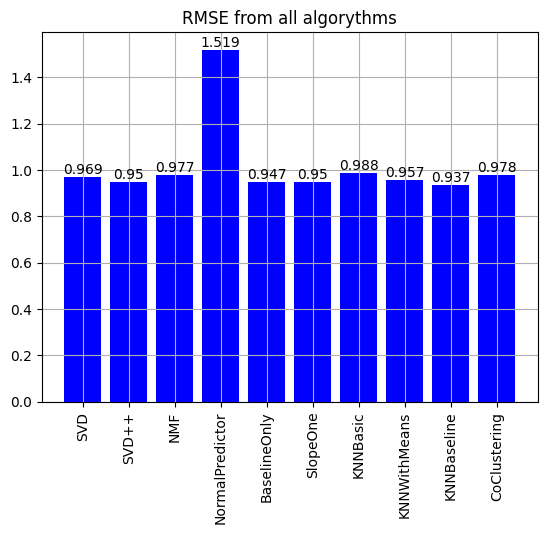

In [18]:
import matplotlib.pyplot as plt

plt.bar(results.Algorythms, results.RMSE, color='blue')
plt.xticks(rotation=90)
for i, value in enumerate(results.RMSE):
    plt.text(i, value, str(round(value, 3)), ha='center', va='bottom')
plt.title('RMSE from all algorythms')
plt.grid()
plt.show()

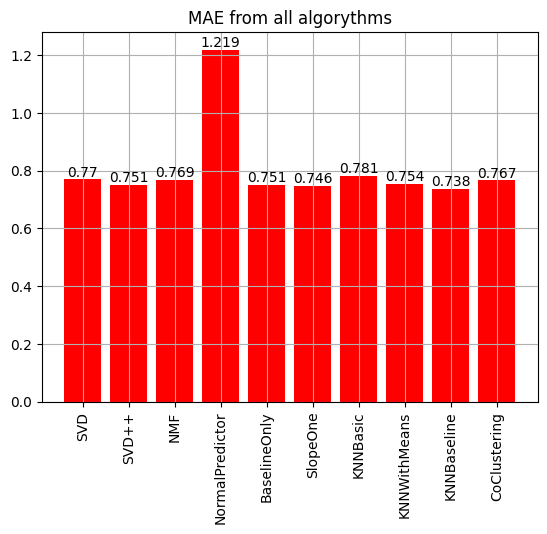

In [21]:
plt.bar(results.Algorythms, results.MAE, color='red')
plt.xticks(rotation=90)
for i, value in enumerate(results.MAE):
    plt.text(i, value, str(round(value, 3)), ha='center', va='bottom')
plt.title('MAE from all algorythms')
plt.grid()
plt.show()

Резумуючи, можна сказати, що алгоритми KNNBasic та CoClustering відпрацювали найкраще для цього набору данних